### Written by Chuan-Heng Lin @henrilin28 based on @fedhere's example for NYU CUSP PUI2016_chl557
### For Assignment 2 you should design your own investigation into the citibike data.

- Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. 

### At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. Categorical can be anhything that can be punt into classes (e.g. day/night, male/female, 2014/2015/2016.... as long as you set up your experiment the proper way!)

- Choose the significance threshold
- Clearly state they Null and Alternate hypothesis
- Wrangle the data so that it is ready for your analysis.

In [3]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [100]:
os.getenv ('PUIDATA')

'/home/cusp/chl557/PUIdata'

# IDEA:
## Customer are less likely than Subscripter to commute by bike

# NULL HYPOTHESIS:
## The ratio of Subscripter biking on week days to Subscripter biking on weekends is _the same_ or _lower_  than the ratio of Customer biking on week days to subscripter biking on weekends [modified based on @EstherNiu's observation]

# _$H_0$_ : $\frac{S_{\mathrm{weekend}}}{S_{\mathrm{week}}} <= \frac{C_{\mathrm{weekend}}}{C_{\mathrm{week}}}$
# _$H_1$_ : $\frac{S_{\mathrm{weekend}}}{S_{\mathrm{week}}} > \frac{C_{\mathrm{weekend}}}{C_{\mathrm{week}}}$


## significance level  $\alpha=0.05$




## reading data from citibike csv file from Jan 2015


### download and move  data to PUIDATA


In [88]:
os.getenv ('PUIDATA')

'/home/cusp/chl557/PUIdata'

In [101]:
def check_and_curl(datestring):
    
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("done")
        os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
        os.system("unzip " + datestring + "-citibike-tripdata.zip") 
        os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")+"/")
        os.system("rm"+ datestring + "-citibike-tripdata.zip")
        os.system("rm"+ datestring + "-citibike-tripdata.csv")
        ## NOTE: old csv citibike data had a different name structure. 
        if '2014' in datestring:
            os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")+"/")
            print ("abc")
    ### One final check:
    
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")



def get_citi_bike(datestring):
    print ("Downloading {}".format(datestring))
    
    #check if the file or folder is existed 
    
    if not os.path.isdir(os.getenv('PUIDATA')):
        print ("here")
        os.system("mkdir " + os.getenv('PUIDATA'))  
    check_and_curl(datestring)
datestring = '201501'
get_citi_bike(datestring)  

file in place, you can continue


In [5]:
#datestring = '201501'
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [7]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'birth year'], axis=1, inplace=True)

In [8]:
df.head()

,usertype,date
0,Subscriber,2015-01-01 00:01:00
1,Subscriber,2015-01-01 00:02:00
2,Subscriber,2015-01-01 00:04:00
3,Subscriber,2015-01-01 00:04:00
4,Subscriber,2015-01-01 00:05:00


In [9]:
df.usertype.unique()

array(['Subscriber', 'Customer'], dtype=object)

# lets separate Subscriber (_m) from Customer (_w) to test various hypothesis 

plot the number of trips per week day

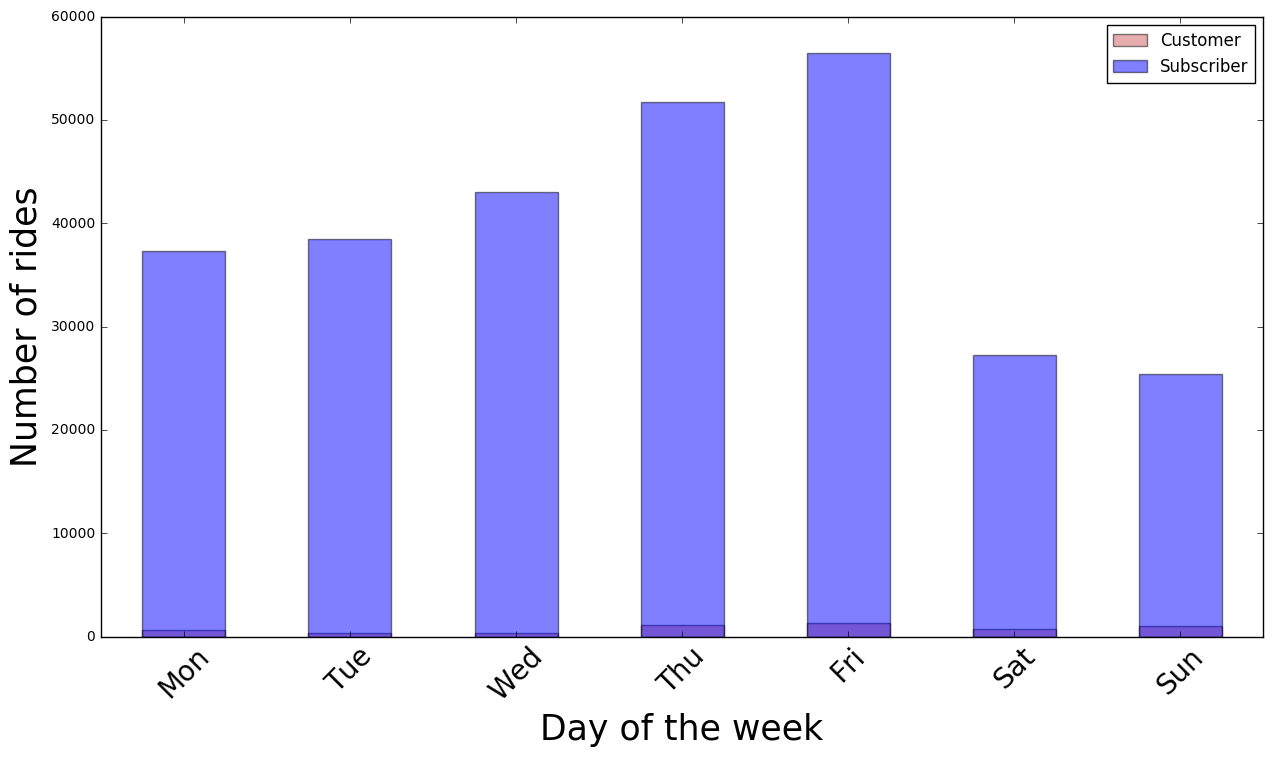

In [12]:
fig=pl.figure(figsize(15,8))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas

((df['date'][df['usertype'] == "Customer"].groupby([df['date'].dt.weekday]).count())).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         alpha=0.5)

ax = ((df['date'][df['usertype'] == "Subscriber"].groupby([df['date'].dt.weekday]).count())).plot(kind="bar", 
                                                                                              alpha=0.5)
ax.set_ylabel("Number of rides",fontsize=25)
ax.set_xlabel("Day of the week",fontsize =25)
temp = ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20,rotation=45)
pl.legend(["Customer","Subscriber"])

### Figure 1.: plot of number of rides in C or S during the week

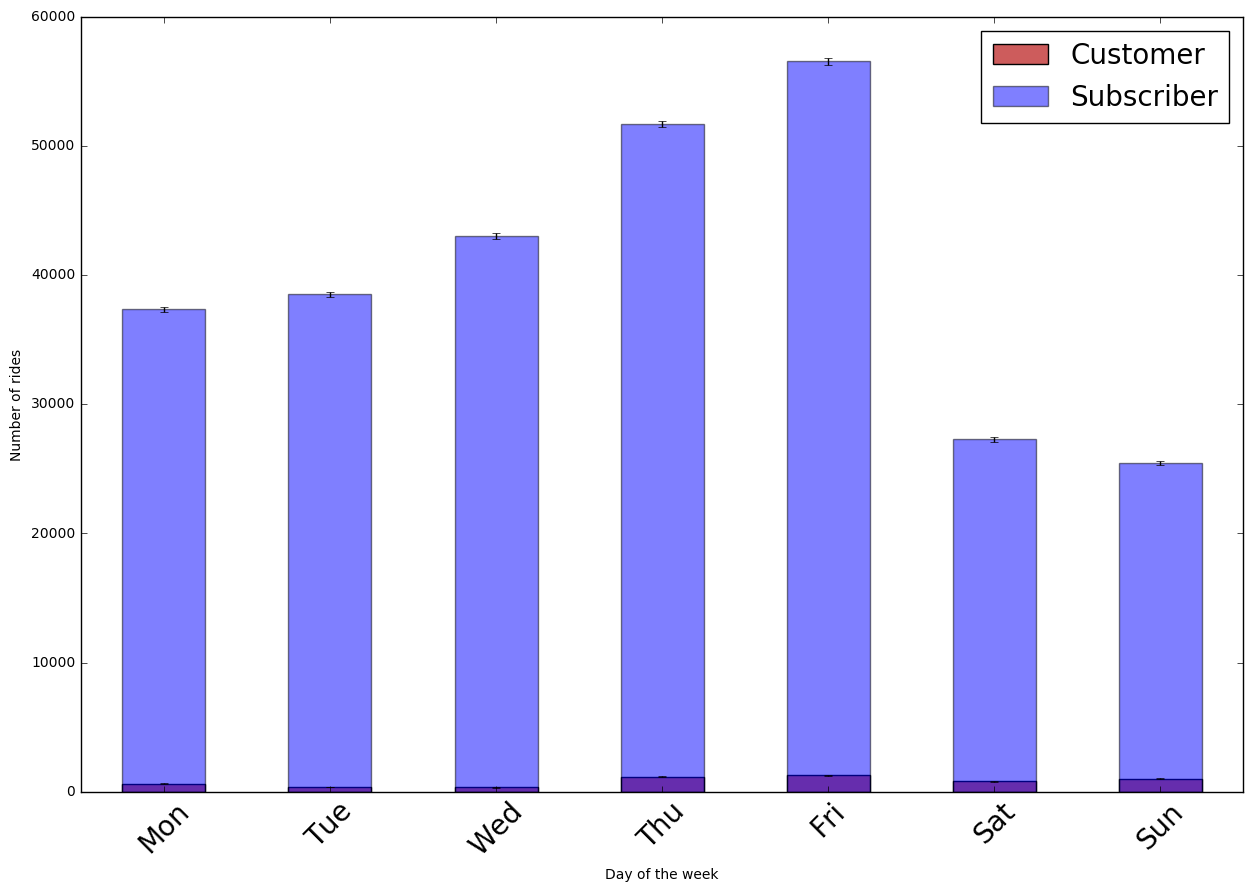

In [15]:
fig=pl.figure(figsize(15,10))

counts_w = df.date[df.usertype == "Customer"].groupby([df.date.dt.weekday]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='Customer')


counts_m = df.date[df.usertype=="Subscriber"].groupby([df.date.dt.weekday]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], label='Subscriber')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20,rotation=45)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(fontsize=20)


## Figure 1: Distribution of Citibike bikers by gender in January 2015, absolute counts

Note: These are absolute numbers. It is very hard to compare absolute numbers. Ratios (or proportions) are more ameable to comparison, so let's _normalize_ the distribution of man, and that of women (i.e. devide them by the total number of rides for that gender. Notice that i have to normalize the errorbars too!)



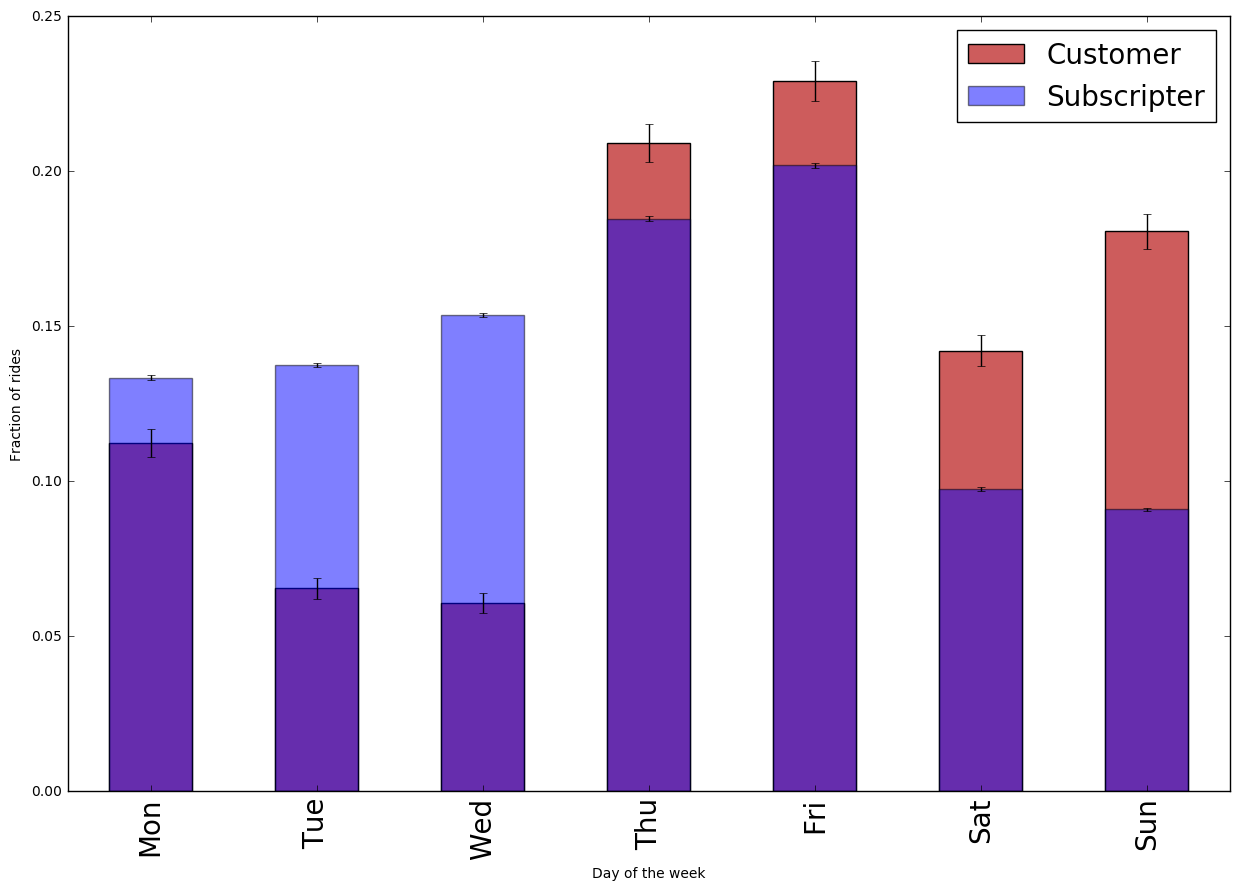

In [16]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='Customer')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m)/norm_m,(error_m)/norm_m)], label='Subscripter')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(fontsize=20)


## Figure 2: Normalized Distribution of Citibike bikers by UserType in January 2015

## Set up the test of proportions

In [19]:
week_w = sum(counts_w[:-2]) * 1.0 / norm_w
weekend_w = sum(counts_w[-2:]) * 1.0 / norm_w
eweek_w = np.sqrt(sum(error_w[:-2]**2)) / norm_w
eweekend_w = np.sqrt(sum(error_w[-2:]**2)) / norm_w

week_m = sum(counts_m[:-2]) * 1.0 / norm_m
weekend_m = sum(counts_m[-2:]) * 1.0 / norm_m
eweek_m = np.sqrt(sum(error_m[:-2]**2)) / norm_m
eweekend_m = np.sqrt(sum(error_m[-2:]**2)) / norm_m

print("Customer: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m, weekend_m, eweek_m, eweekend_m))
print("Subscirpter: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_w, weekend_w, eweek_w, eweekend_w))

Customer: week:0.812, weekend:0.188, weekend error:0.002, weekend error:0.001
Subscirpter: week:0.677, weekend:0.323, weekend error:0.011, weekend error:0.008


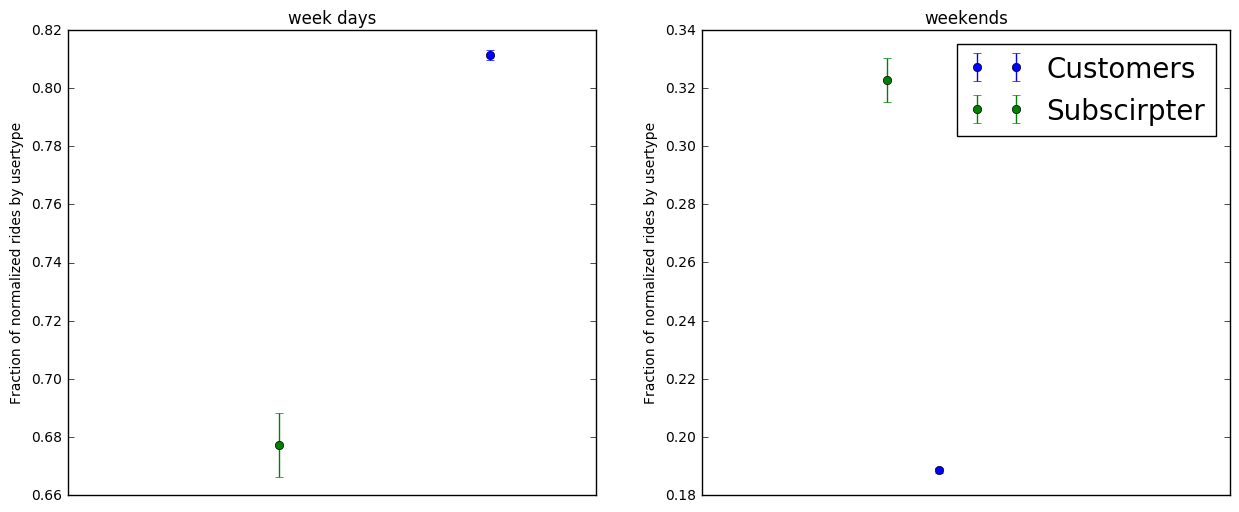

In [20]:
fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
ax1.errorbar([0.4], [week_m], yerr=[eweek_m], fmt='o', label='Customers')
ax1.errorbar([0.2], [week_w], yerr=[eweek_w], fmt='o', label='Subscirpter')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_m], yerr=[eweekend_m], fmt='o', label='Customers')
ax2.errorbar([0.2], [weekend_w], yerr=[eweekend_w], fmt='o', label='Subscirpter')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by usertype")
ax1.set_ylabel("Fraction of normalized rides by usertype")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

## Figure 3: Fraction of Citibike bikers per Usertype in January 2016 for week days (left) and weekends (right)

# This is the portion of Assignment 2 that should be done by the week of September 26. 
# The rest will be due the following week.

In [143]:
p = (week_w * norm_w + week_m * norm_m) * 1.0 / (norm_w + norm_m)
SE = np.sqrt(p * ( 1. - p ) * ( (1. / norm_w) + (1. / norm_m) ) )
z = (week_w - week_m ) / SE
print(p, SE, z)

0.679798787853 0.00628126577513 21.3962148591


### Is the percentage of women that ride on weekends lower or equal to that of man?

In [144]:
P0mP1 = weekend_m - weekend_w
print ("difference between Subsrcipter and commuter on weekend: ", P0mP1)

difference between Subsrcipter and commuter on weekend:  0.134395312112


### Is this difference statistically significant?

In [149]:
from scipy.stats import norm
sp_stdev= lambda p0, n1: np.sqrt(p0*(1-p0)/n1)
sp_stdev_mw=sp_stdev(weekend_w,norm_m)

zscore = lambda p0, p1, s : (p0-p1)/s
z = zscore(weekend_w, weekend_m, sp_stdev_mw)
print (z) 

-181.821106831


## The largest number i see in the z stats table in assignment 1 is 2.9, which gives me a p value
## <0.0002, which is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant!
### Notice that this statistical significance was obvious in the plot: the distance between the error bars, which represent 1 standard deviation, is larger than a factor 2, i.e. if I inflate each error bar by a factor 2 they still do not overlap, which means I am more significant then 2  standard deviations : p<0.05

# Lets see if our test holds in the summer, when outfits are more ameable to riding

In [130]:
datestring = '201506'
get_citi_bike(datestring)

done
file in place, you can continue


In [22]:
#datestring = '201506'
df_06 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df_06['date'] = pd.to_datetime(df_06.starttime)

In [23]:
df_06.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [24]:
df_06.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'birth year'], axis=1, inplace=True)


In [25]:
df_06.head()

,usertype,date
0,Subscriber,2015-01-01 00:01:00
1,Subscriber,2015-01-01 00:02:00
2,Subscriber,2015-01-01 00:04:00
3,Subscriber,2015-01-01 00:04:00
4,Subscriber,2015-01-01 00:05:00


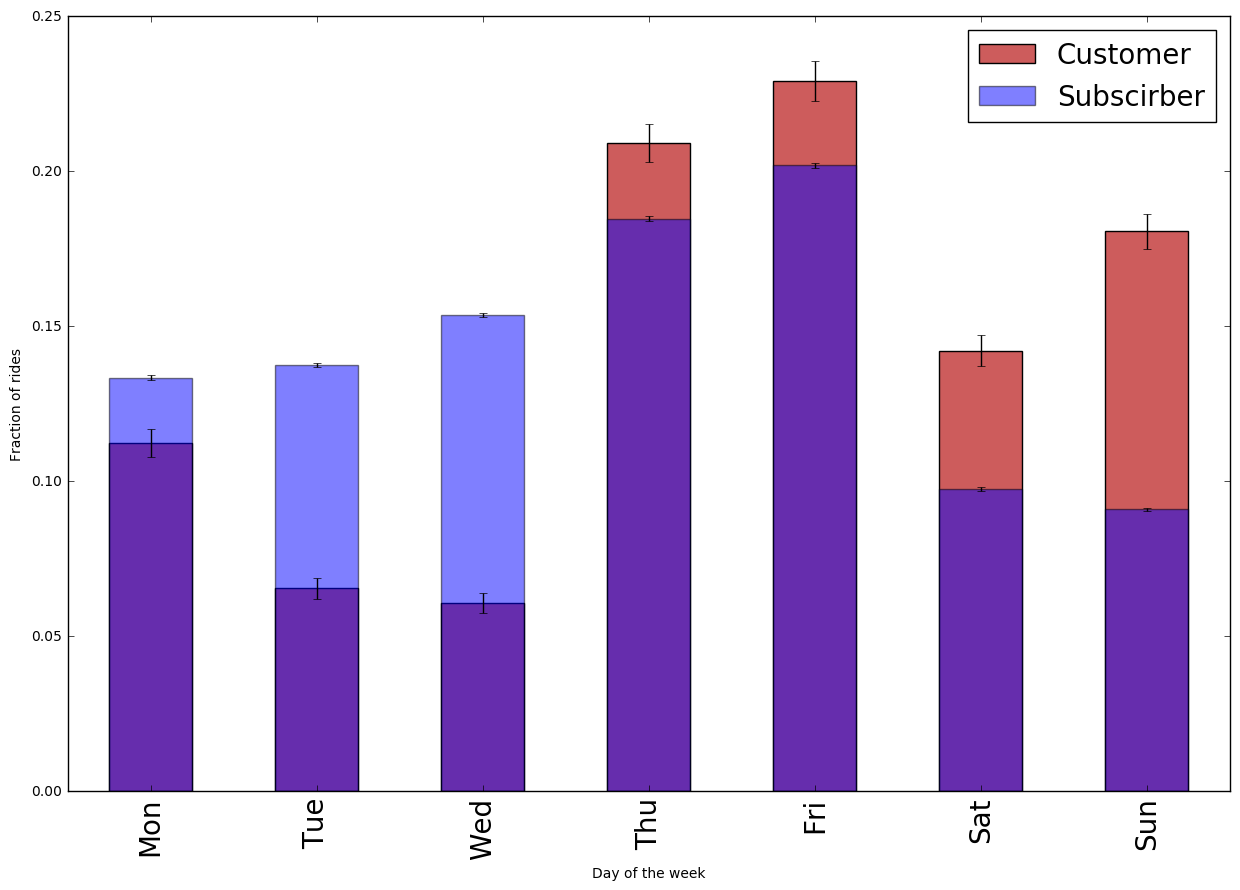

In [27]:
fig=pl.figure(figsize(15,10))

counts_w06 = df_06.date[df_06.usertype == "Customer"].groupby([df_06.date.dt.weekday]).count()
norm_w06 = counts_w06.sum()
error_w06 = np.sqrt(counts_w06)

((counts_w06) / norm_w06).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w06) / norm_w06,(error_w06) / norm_w06)], label='Customer, June')

counts_m06 = df_06.date[df_06.usertype== "Subscriber"].groupby([df_06.date.dt.weekday]).count()
norm_m06 = counts_m06.sum()
error_m06 = np.sqrt(counts_m06)
ax=((counts_m06) / norm_m06).plot(kind="bar", alpha=0.5, yerr=[((error_m06)/norm_m06,(error_m06)/norm_m06)], 
                                  label='Subscriber, June')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")


pl.legend(['Customer','Subscirber'],fontsize=20)

## Figure 4: Normalized Distribution of Citibike bikers by usertyep in June 2016

In [28]:

week_w = sum(counts_w06[:-2])*1.0/norm_w06
weekend_w = sum(counts_w06[-2:])*1.0/norm_w06
eweek_w = np.sqrt(sum(error_w06[:-2]**2))/norm_w06
eweekend_w = np.sqrt(sum(error_w06[-2:]**2))/norm_w06

week_m = sum(counts_m06[:-2])*1.0/norm_m06
weekend_m = sum(counts_m06[-2:])*1.0/norm_m06
eweek_m = np.sqrt(sum(error_m06[:-2]**2))/norm_m06
eweekend_m = np.sqrt(sum(error_m06[-2:]**2))/norm_m06

print("Men: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m, weekend_m, eweek_m, eweekend_m))
print("Women: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_w, weekend_w, eweek_w, eweekend_w))



p = (week_w*norm_w06 + week_m*norm_m06)*1.0/ (norm_w06 + norm_m06)
SE = np.sqrt(p * ( 1. - p ) * ( (1./norm_w06) + (1./norm_m06) ) )
z = (week_w - week_m ) / SE
print("P value: {}, SE: {}, Z: {}".format(p, SE, z))

Men: week:0.812, weekend:0.188, weekend error:0.002, weekend error:0.001
Women: week:0.677, weekend:0.323, weekend error:0.011, weekend error:0.008
P value: 0.8088964531854093, SE: 0.005293297828858644, Z: -25.3897128891861


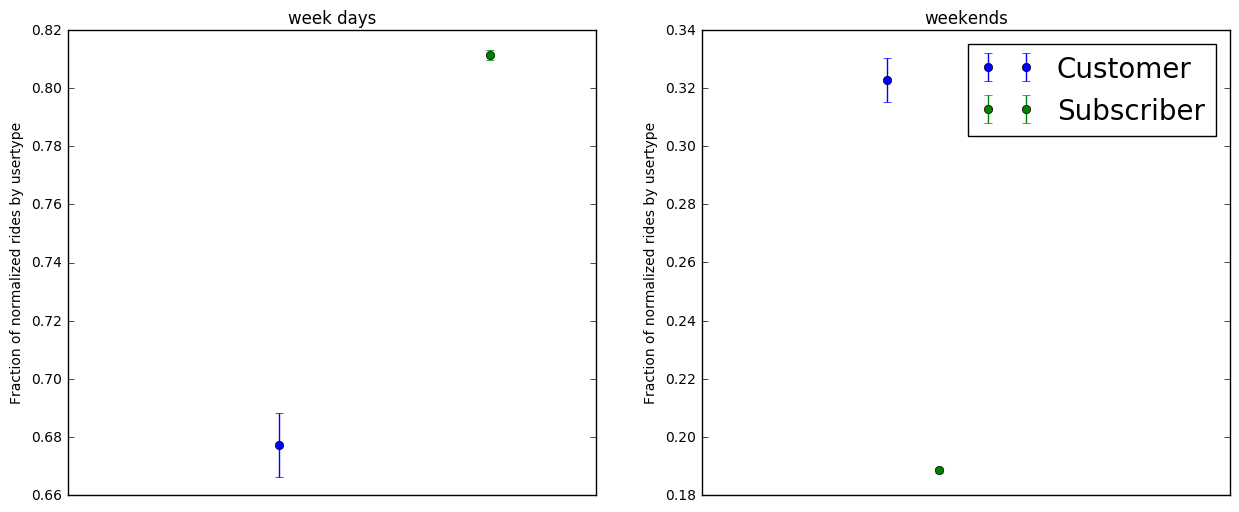

In [31]:
fig=pl.figure(figsize(15,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

ax1.errorbar([0.2],[week_w], yerr=[eweek_w], fmt='o', label='Customer')
ax1.errorbar([0.4],[week_m], yerr=[eweek_m], fmt='o', label='Subscriber')
ax1.set_xlim(0,0.5)
ax2.errorbar([0.2],[weekend_w], yerr=[eweekend_w], fmt='o', label='Customer')
ax2.errorbar([0.4],[weekend_m], yerr=[eweekend_m], fmt='o', label='Subscriber')
ax1.set_xlim(0,0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by usertype")
ax1.set_ylabel("Fraction of normalized rides by usertype")

pl.xlim(-0.5,1.5)
pl.legend(fontsize=20)

## Figure 5: Fraction of Citibike bikers per Usertype in June 2015 for week days (left) and weekends (right)